In [1]:
!cat Dataset* > Dataset.zip

In [2]:
!unzip Dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Dataset/eosinophil/EO_581610.jpg  
  inflating: Dataset/eosinophil/EO_810213.jpg  
  inflating: Dataset/eosinophil/EO_801674.jpg  
  inflating: Dataset/eosinophil/EO_761108.jpg  
  inflating: Dataset/eosinophil/EO_106564.jpg  
  inflating: Dataset/eosinophil/EO_327928.jpg  
  inflating: Dataset/eosinophil/EO_119952.jpg  
  inflating: Dataset/eosinophil/EO_376623.jpg  
  inflating: Dataset/eosinophil/EO_769223.jpg  
  inflating: Dataset/eosinophil/EO_67379.jpg  
  inflating: Dataset/eosinophil/EO_330411.jpg  
  inflating: Dataset/eosinophil/EO_233502.jpg  
  inflating: Dataset/eosinophil/EO_874796.jpg  
  inflating: Dataset/eosinophil/EO_769690.jpg  
  inflating: Dataset/eosinophil/EO_16249708.jpg  
  inflating: Dataset/eosinophil/EO_565721.jpg  
  inflating: Dataset/eosinophil/EO_673984.jpg  
  inflating: Dataset/eosinophil/EO_731641.jpg  
  inflating: Dataset/eosinophil/EO_6091.jpg  
  inflating: Dataset/eosinophil/

In [3]:
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization 
from keras.layers import Dropout, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
CLASS_NUM = 5
BATCH_SIZE = 16
IMAGE_SHAPE = (224, 224, 3)
IMAGE_TRAIN = 'Dataset'

# prepare data
train_datagen = ImageDataGenerator(
    rotation_range=15,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    IMAGE_TRAIN,
    target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="training",
    seed=123,
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    IMAGE_TRAIN,
    target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="validation",
    seed=123,
    shuffle=False
)

EPOCH_STEPS_TRAIN = int(8076/BATCH_SIZE)
EPOCH_STEPS_VAL = int(2017/BATCH_SIZE)

Found 8076 images belonging to 5 classes.
Found 2017 images belonging to 5 classes.


In [5]:
def VGG16():
  X_input = Input(IMAGE_SHAPE)
  X = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(X_input)
  X = Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu")(X)
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)

  X = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)

  X = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)

  X = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)

  X = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(X)
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)

  X = Flatten()(X)
  X = Dense(units=4096,activation="relu")(X)
  X = Dense(units=4096,activation="relu")(X)
  X = Dense(units=CLASS_NUM, activation="softmax")(X)

  model = Model(inputs=X_input, outputs=X, name="VGG16")
  return model

In [6]:
model = VGG16()

In [7]:
model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [8]:
loss = CategoricalCrossentropy(
    name='categorical_crossentropy'
)
optimizer = SGD(learning_rate=0.0001)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [9]:
start = time.time()
train_history = model.fit(train_generator,
          steps_per_epoch=EPOCH_STEPS_TRAIN,
          epochs=100,
          validation_data=val_generator,
          validation_steps=EPOCH_STEPS_VAL,
          validation_freq=1)
end = time.time() - start
print("Processing time: {}".format(end))

Epoch 1/100
504/504 [==============================] - 180s 263ms/step - loss: 1.3674 - accuracy: 0.4613 - val_loss: 0.7617 - val_accuracy: 0.7450
Epoch 2/100
504/504 [==============================] - 138s 264ms/step - loss: 0.6670 - accuracy: 0.7523 - val_loss: 0.5669 - val_accuracy: 0.7688
Epoch 3/100
504/504 [==============================] - 133s 264ms/step - loss: 0.4945 - accuracy: 0.8084 - val_loss: 0.4081 - val_accuracy: 0.8408
Epoch 4/100
504/504 [==============================] - 134s 266ms/step - loss: 0.3871 - accuracy: 0.8557 - val_loss: 0.4665 - val_accuracy: 0.7902
Epoch 5/100
504/504 [==============================] - 133s 265ms/step - loss: 0.3409 - accuracy: 0.8734 - val_loss: 0.2276 - val_accuracy: 0.9315
Epoch 6/100
504/504 [==============================] - 133s 265ms/step - loss: 0.2662 - accuracy: 0.9113 - val_loss: 0.4745 - val_accuracy: 0.8075
Epoch 7/100
504/504 [==============================] - 134s 266ms/step - loss: 0.1982 - accuracy: 0.9353 - val_loss: 0

In [10]:
model.save('VGG16.h5')

In [11]:
history_all = {}
# Save history    
if len(history_all) == 0:
    history_all = {key: [] for key in train_history.history}

for key in history_all:
    history_all[key].extend(train_history.history[key])

In [12]:
def show_train_history(history, xlabel, ylabel, train, title):
    for item in train:
        plt.plot(history[item])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(train, loc='upper left')
    plt.show()

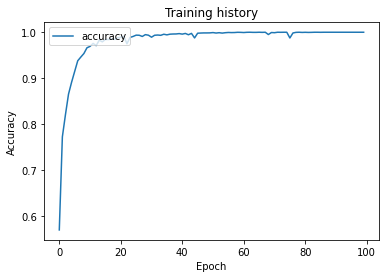

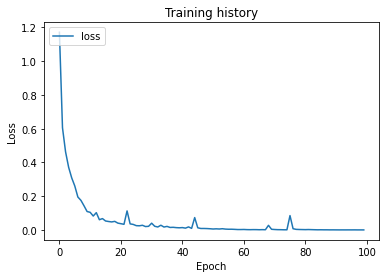

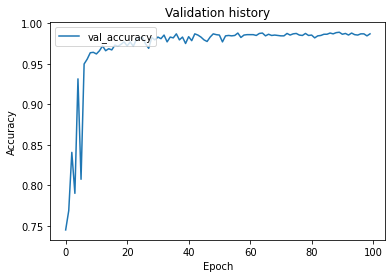

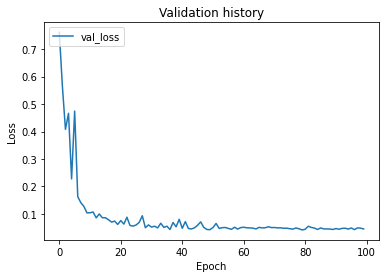

In [13]:
show_train_history(history_all, 'Epoch', 'Accuracy', ('accuracy',), 'Training history')
show_train_history(history_all, 'Epoch', 'Loss', ('loss',), 'Training history')
show_train_history(history_all, 'Epoch', 'Accuracy', ('val_accuracy',), 'Validation history')
show_train_history(history_all, 'Epoch', 'Loss', ('val_loss',), 'Validation history')

In [ ]:
!cat VGG16Part* > VGG16.h5

In [ ]:
model = keras.models.load_model('VGG16.h5')

In [ ]:
Y_pred = model.predict(val_generator)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
CLASS_NAMES= ['basophil', 'eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']
print(classification_report(val_generator.classes, y_pred, target_names=CLASS_NAMES))

In [ ]:
from google.colab import files
files.download('VGG16.h5')